In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

<b>Don't run this on windows, only on paperspace...

In [ ]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

### Create Data

Load a ticker to get a realistic date index

In [7]:
TICKER = 'MSFT'
PATH = f'data/{TICKER}-test'

In [8]:
data = fat.get_price_data(TICKER)
data.head()
TICKER = 'FAKE-LINE-001'

Loaded data for MSFT: 1986-03-13 to 2018-02-26.


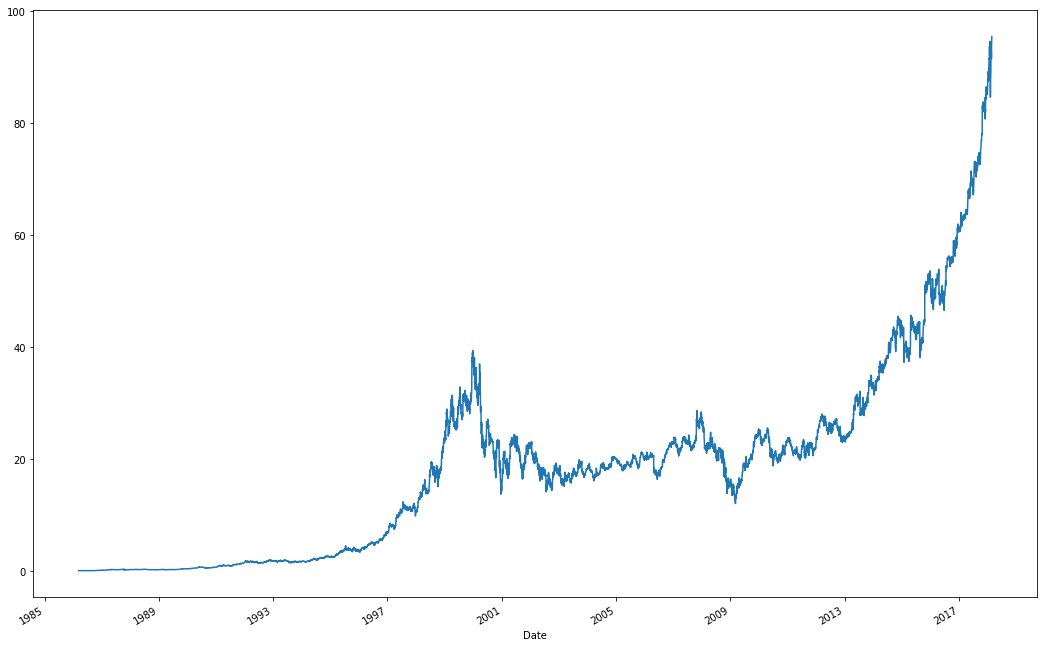

In [9]:
data['Adj Close'].plot()

In [10]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.064270,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.066566,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.067713,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.065992,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.064844,47894400


In [11]:
line_start = 5.2
line_slope = 20/365.0
line = np.empty((len(data),1))
for i in range(len(line)) :
    line[i] = line_start + i*line_slope

In [12]:
data['Adj Close'] = line
for i in range(-5, 0, 1) :
    data[f'Adj Close {i}d'] = data['Adj Close'].shift(-i)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close -5d,Adj Close -4d,Adj Close -3d,Adj Close -2d,Adj Close -1d
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,5.200000,1031788800,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,5.254795,308160000,NaN,NaN,NaN,NaN,5.200000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,5.309589,133171200,NaN,NaN,NaN,5.200000,5.254795
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,5.364384,67766400,NaN,NaN,5.200000,5.254795,5.309589
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,5.419178,47894400,NaN,5.2,5.254795,5.309589,5.364384


In [13]:
data['Open'] = data['Adj Close -1d']
data['Low'] = data['Open']
data['High'] = data['Adj Close']
data['Close'] = data['Adj Close']
data['Volume'] = 0

data = data.set_index('Date')
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close -5d,Adj Close -4d,Adj Close -3d,Adj Close -2d,Adj Close -1d
Date,,,,,,,,,,,
1986-03-20,5.419178,5.473973,5.419178,5.473973,5.473973,0,5.200000,5.254795,5.309589,5.364384,5.419178
1986-03-21,5.473973,5.528767,5.473973,5.528767,5.528767,0,5.254795,5.309589,5.364384,5.419178,5.473973
1986-03-24,5.528767,5.583562,5.528767,5.583562,5.583562,0,5.309589,5.364384,5.419178,5.473973,5.528767
1986-03-25,5.583562,5.638356,5.583562,5.638356,5.638356,0,5.364384,5.419178,5.473973,5.528767,5.583562
1986-03-26,5.638356,5.693151,5.638356,5.693151,5.693151,0,5.419178,5.473973,5.528767,5.583562,5.638356


## Create Features

In [14]:
data = fat.create_dl_features_df(data)

In [15]:
data = data.dropna()
data[-14:].T

Date,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00
Open,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46,446.515
High,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46,446.515,446.57
Low,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46,446.515
Close,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46,446.515,446.57
Adj Close,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46,446.515,446.57
Volume,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adj Close -5d,445.584,445.638,445.693,445.748,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296
Adj Close -4d,445.638,445.693,445.748,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351
Adj Close -3d,445.693,445.748,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405
Adj Close -2d,445.748,445.803,445.858,445.912,445.967,446.022,446.077,446.132,446.186,446.241,446.296,446.351,446.405,446.46


We're going to try to predict 'Adj Close' price tomorrow, so add a column with that info.

In [21]:
data['Adj Close +1d'] = data['Adj Close'].shift(-1)
del data['Elapsed']
data.head().T

Date,1986-03-20 00:00:00,1986-03-21 00:00:00,1986-03-24 00:00:00,1986-03-25 00:00:00,1986-03-26 00:00:00
Open,5.41918,5.47397,5.52877,5.58356,5.63836
High,5.47397,5.52877,5.58356,5.63836,5.69315
Low,5.41918,5.47397,5.52877,5.58356,5.63836
Close,5.47397,5.52877,5.58356,5.63836,5.69315
Adj Close,5.47397,5.52877,5.58356,5.63836,5.69315
Volume,0,0,0,0,0
Adj Close -5d,5.2,5.25479,5.30959,5.36438,5.41918
Adj Close -4d,5.25479,5.30959,5.36438,5.41918,5.47397
Adj Close -3d,5.30959,5.36438,5.41918,5.47397,5.52877
Adj Close -2d,5.36438,5.41918,5.47397,5.52877,5.58356


In [22]:
data = data.dropna()

In [23]:
DataFrameSummary(data).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Open,8049,225.912,127.326,5.41918,115.666,225.912,336.159,446.405,8049,8049,0,0%,numeric
High,8049,225.967,127.326,5.47397,115.721,225.967,336.214,446.46,8049,8049,0,0%,numeric
Low,8049,225.912,127.326,5.41918,115.666,225.912,336.159,446.405,8049,8049,0,0%,numeric
Close,8049,225.967,127.326,5.47397,115.721,225.967,336.214,446.46,8049,8049,0,0%,numeric
Adj Close,8049,225.967,127.326,5.47397,115.721,225.967,336.214,446.46,8049,8049,0,0%,numeric
Volume,8049,0,0,0,0,0,0,0,8049,1,0,0%,constant
Adj Close -5d,8049,225.693,127.326,5.2,115.447,225.693,335.94,446.186,8049,8049,0,0%,numeric
Adj Close -4d,8049,225.748,127.326,5.25479,115.501,225.748,335.995,446.241,8049,8049,0,0%,numeric
Adj Close -3d,8049,225.803,127.326,5.30959,115.556,225.803,336.049,446.296,8049,8049,0,0%,numeric
Adj Close -2d,8049,225.858,127.326,5.36438,115.611,225.858,336.104,446.351,8049,8049,0,0%,numeric


In [24]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Adj Close -5d',
       'Adj Close -4d', 'Adj Close -3d', 'Adj Close -2d', 'Adj Close -1d',
       'Days Since Trading', 'Days Until Trading', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Adj Close +1d'],
      dtype='object')

Break the columns up into "category variables" and "continuous variables".

In [25]:
cat_vars = ['Days Since Trading', 'Days Until Trading', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

contin_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Adj Close -5d',
               'Adj Close -4d', 'Adj Close -3d', 'Adj Close -2d', 'Adj Close -1d',
               'Year']


In [26]:
print(f'len(cat_vars) = {len(cat_vars)}')
print(f'len(contin_vars) = {len(contin_vars)}')
print(f'len(data.columns) = {len(data.columns)}')
assert(len(data.columns) == (len(cat_vars) + len(contin_vars) + 1))

len(cat_vars) = 13
len(contin_vars) = 12
len(data.columns) = 26


Split data into train and test sets.

In [27]:
data_len = len(data)
train_len = int(data_len * .8)
data_train = data[:train_len].copy()
data_test = data[train_len:].copy()

In [28]:
dep = 'Adj Close +1d'
data_train = data_train.reset_index()
data_train = data_train[cat_vars+contin_vars+[dep, 'Date']].copy()

In [29]:
data_train.tail().T

,6434,6435,6436,6437,6438
Days Since Trading,1,1,3,1,1
Days Until Trading,1,3,1,1,1
Month,9,9,9,9,9
Week,38,38,39,39,39
Day,22,23,26,27,28
Dayofweek,3,4,0,1,2
Dayofyear,265,266,269,270,271
Is_month_end,False,False,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,False,False,False,False


In [30]:
data_test[dep] = 0
data_test = data_test.reset_index()
data_test = data_test[cat_vars+contin_vars+[dep,'Date']].copy()

In [31]:
data_test.head().T

,0,1,2,3,4
Days Since Trading,1,1,3,1,1
Days Until Trading,1,3,1,1,1
Month,9,9,10,10,10
Week,39,39,40,40,40
Day,29,30,3,4,5
Dayofweek,3,4,0,1,2
Dayofyear,272,273,276,277,278
Is_month_end,False,True,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,True,False,False,False


In [32]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [33]:
for v in cat_vars: 
    data_train[v] = data_train[v].astype('category').cat.as_ordered()

In [34]:
apply_cats(data_test, data_train)

In [35]:
for v in contin_vars:
    data_train[v] = data_train[v].astype('float32')
    data_test[v] = data_test[v].astype('float32')

In [36]:
DataFrameSummary(data_train).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Days Since Trading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,7,0,0%,categorical
Days Until Trading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,6,0,0%,categorical
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,12,0,0%,categorical
Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,53,0,0%,categorical
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,31,0,0%,categorical
Dayofweek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,5,0,0%,categorical
Dayofyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,365,0,0%,categorical
Is_month_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,2,0,0%,bool
Is_month_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,2,0,0%,bool
Is_quarter_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6439,2,0,0%,bool


We can now process our data...

In [37]:
# we get a AttributeError here if we don't have skip_flds = ['Date']
data_train = data_train.set_index('Date')
df_train, y, nas, mapper = proc_df(data_train, dep, do_scale=True)
yl = np.log(y)

In [38]:
df_train.head(2).T

Date,1986-03-20 00:00:00,1986-03-21 00:00:00
Days Since Trading,1.000000,2.000000
Days Until Trading,1.000000,3.000000
Month,3.000000,3.000000
Week,12.000000,12.000000
Day,20.000000,21.000000
Dayofweek,4.000000,5.000000
Dayofyear,78.000000,79.000000
Is_month_end,1.000000,1.000000
Is_month_start,1.000000,1.000000
Is_quarter_end,1.000000,1.000000


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [39]:
train_ratio = 0.75
data_size = len(df_train)
train_size = int(data_size * train_ratio)
val_idx = list(range(train_size, data_size))

In [40]:
data_test = data_test.set_index('Date')
df_test, _, nas, mapper = proc_df(data_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [41]:
#joined = joined.dropna()
#joined_test = joined_test.dropna()

## Deep Learning

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [42]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [43]:
# before: bs=128, changed to bs=8 to get results while finding learning rate
md = ColumnarModelData.from_data_frame(PATH, val_idx, df_train, yl.astype(np.float32), cat_flds=cat_vars, bs=8,
                                       test_df=df_test)

NameError: name 'ColumnarModelData' is not defined

Create categorical variables.

In [ ]:
cat_sz = [(c, len(data_train[c].cat.categories)+1) for c in cat_vars]
cat_sz

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [ ]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

Find learning rate.

In [ ]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.lr_find(1e-7,1e-2)

In [ ]:
m.sched.plot(100)

### Sample

In [ ]:
m = md.get_learner(emb_szs, len(df_train.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.fit(lr, 3, metrics=[exp_rmspe])

In [ ]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

In [ ]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

In [ ]:
m.save('val0')

In [ ]:
m.load('val0')

In [ ]:
x,y=m.predict_with_targs()

In [ ]:
exp_rmspe(x,y)

In [ ]:
pred_test=m.predict(is_test=True)

In [ ]:
pred_test = np.exp(pred_test)

In [ ]:
data_test[dep]=pred_test

In [ ]:
# prediction are made for the next day ('Date'+1), so shift data so that date is proper date for value predicted 
#predict = pd.DataFrame(data_test[dep].shift(1))
#predict.columns = [f'Predicted {TICKER} Price']
#predict[f'Actual {TICKER} Price'] = data['Adj Close']
#predict.dropna()
#predict['Prediction Error'] = predict[0] - predict[1]

In [ ]:
predict = pd.DataFrame(data_test)

In [ ]:
filename = f'{PATH}/{TICKER}-predictions-{dt.now():%Y%m%d-%H%M%S}.csv'
predict.to_csv(filename)

In [ ]:
predict.plot()

In [ ]:
rmse = np.sqrt(mean_squared_error(predict[0], predict[1]))
rmspe = rmse / len(predict)
#ex_rmspe = np.(rmspe)
print(f'RMSE = {rmse}')
print(f'RMSPE = {rmspe}')
#print(f'exp RMSPE = {ex_rmspe}')